# Introduction à SpaCy

[Spacy](https://spacy.io/) est une librairie open source très répandue pour effectuer des tâches NLP à travers Python. Elle permet entre autres de faire de la segmentation de phrases, du POS tagging, de la lemmatisation, de l'analyse syntaxique, de l'extraction de _patterns_, mais aussi des tâches plus complexes comme de la classification de textes.

Spacy est conçu pour être rapide, efficace et facile à utiliser. Il dispose de ressources pour un grand nombre de langues, dont l'anglais, le français, et le néerlandais.

Dans le cadre du TP à rendre, vous serez amenés à utiliser SpaCy. Ce notebook vous donne quelques bases afin de vous familiariser avec l'outil et de vous préparer pour le TP.

Dans ce notebook, nous allons installer SpaCy et importer les ressources du Français. Ensuite, nous allons explorer les outils disponibles à travers l'analyse d'un texte.

## 1. Installation

Nous allons ici installer la librairie SpaCy et télécharger le modèle français: nous utiliserons ici le modèle "medium" (`md`). Pour de meilleures performances, vous pouvez utiliser le modèle "large" (`lg`) ou "transformer" (`trf`)


In [2]:
!pip install spacy tabulate
!python -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 19.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Nous allons ensuite importer SpaCy dans le code python et instantier un "objet" appelé `nlp` qui contiendra le modèle qu'on vient d'installer.

In [3]:
import spacy
nlp = spacy.load("fr_core_news_md")

## 2. Analyse d'un texte

Nous allons choisir un texte, que l'on va découper en phrases. Ensuite, on analysera plus en détails la première phrase du texte.

In [4]:
text = """Le traitement automatique du langage naturel (NLP) est une branche de l'intelligence artificielle qui s'intéresse à la compréhension et à l'analyse du langage humain par des machines. Le NLP permet d'extraire des informations pertinentes à partir de textes, de reconnaître les entités nommées, de comprendre les relations entre les mots et les phrases, et de générer des textes automatiquement. Les applications courantes du NLP incluent la traduction automatique, la reconnaissance de la parole, l'analyse de sentiments, la résumé automatique de textes et l'analyse de l'opinion. Les techniques de NLP peuvent être utilisées dans de nombreux domaines, tels que la finance, la santé, le commerce électronique et les médias sociaux, pour aider les entreprises à mieux comprendre les besoins et les préférences des utilisateurs."""

# Application de l'analyseur NLP sur le document
doc = nlp(text)

# Affichage de toutes les phrases
for sentence in doc.sents:
    print(sentence.text)
    print("------------------------------------")

Le traitement automatique du langage naturel (NLP) est une branche de l'intelligence artificielle qui s'intéresse à la compréhension et à l'analyse du langage humain par des machines.
------------------------------------
Le NLP permet d'extraire des informations pertinentes à partir de textes, de reconnaître les entités nommées, de comprendre les relations entre les mots et les phrases, et de générer des textes automatiquement.
------------------------------------
Les applications courantes du NLP incluent la traduction automatique, la reconnaissance de la parole, l'analyse de sentiments, la résumé automatique de textes et l'analyse de l'opinion.
------------------------------------
Les techniques de NLP peuvent être utilisées dans de nombreux domaines, tels que la finance, la santé, le commerce électronique et les médias sociaux, pour aider les entreprises à mieux comprendre les besoins et les préférences des utilisateurs.
------------------------------------


Focalisons-nous sur la première phrase du texte et commençons par la diviser en mots (tokenization). En fait, SpaCy a déjà fait le travail pour nous: la phrase est elle-même considérée comme une liste de mots. On peut donc utiliser une boucle pour itérer à travers les mots de la phrase.

In [5]:
first_sentence = list(doc.sents)[0]

for word in first_sentence:
    print(word.text)

Le
traitement
automatique
du
langage
naturel
(
NLP
)
est
une
branche
de
l'
intelligence
artificielle
qui
s'
intéresse
à
la
compréhension
et
à
l'
analyse
du
langage
humain
par
des
machines
.


Comme nous l'avons présenté plus haut, SpaCy est avant tout un module d'analyse NLP. Il applique des analyses à tous les niveaux (phrase, segments, mots). Par exemple, chacun des mots est associé à une série d'attributs. On peut alors récupérer son `pos`, son `lemme`, ses `informations mortphologiques`, et sa `fonction` dans la phrase. Ici nous utiliserons le module `tabulate` afin d'afficher les résultats dans un tableau, pour des raisons de visibilité.

In [6]:
from tabulate import tabulate

headers = ["Word", "POS", "Lemma", "Morphology", "Dependency"]

tokens = []
for word in first_sentence:
    tokens.append([word.text, word.pos_, word.lemma_, word.morph, word.dep_])

print(tabulate(tokens, headers=headers))



Word           POS    Lemma          Morphology                                             Dependency
-------------  -----  -------------  -----------------------------------------------------  ------------
Le             DET    le             Definite=Def|Gender=Masc|Number=Sing|PronType=Art      det
traitement     NOUN   traitement     Gender=Masc|Number=Sing                                nsubj
automatique    ADJ    automatique    Number=Sing                                            amod
du             ADP    de             Definite=Def|Gender=Masc|Number=Sing|PronType=Art      case
langage        NOUN   langage        Gender=Masc|Number=Sing                                nmod
naturel        ADJ    naturel        Gender=Masc|Number=Sing                                amod
(              PUNCT  (                                                                     punct
NLP            PROPN  NLP                                                                   appos
)             

Comme souligné plus haut, les analyses se font au niveau du mot, mais aussi de la phrase. Il est dès lors possible d'analyser les dépendances au sein de la phrase. SpaCy propose même de visualiser ces dépendances sous la forme d'un arbre.

In [7]:
from spacy import displacy

displacy.render(first_sentence, style="dep", jupyter=True)


## 3. Entités nommées

SpaCy propose également un détecteur d'entités nommées. Une "entité nommée" désigne des mots ou expressions qui identifient spécifiquement des personnes, des lieux, des organisations, etc., dans un texte. C'est un concept clé en traitement du langage naturel pour classer ces éléments dans des catégories prédéfinies.

Voici un exemple d'utilisation via l'analyse d'une nouvelle phrase.

In [8]:
sentence = "Barack Obama et Donald Trump ont visité le Musée du Louvre à Paris en septembre dernier."

doc = nlp(sentence)
headers = ["Entity", "Label"]
entities = []
for entity in doc.ents:
    entities.append([entity.text, entity.label_])

print(tabulate(entities, headers=headers))

Entity           Label
---------------  -------
Barack Obama     PER
Donald Trump     PER
Musée du Louvre  LOC
Paris            LOC


## 4. Vectorisation et similarité sémantique

SpaCy propose également la possibilité de calculer les `embeddings` (vecteurs) de mots et de documents. Cela permet de calculer la proximité sémantique entre des documents par exemple. Vous souvenez-vous du score BERT que nous avons vu dans la partie traduction automatique du cours ? Elle se basait sur ces embeddings !

Faisons quelques tests:


In [12]:
sentence_1 = "Je bois un capuccino et mange un croissant."
sentence_2 = "Je bois un verre de vin et mange une pizza"
sentence_3 = "Le chien est dans le jardin."
sentence_4 = "Le chat est dans la prairie"

In [13]:
doc1 = nlp(sentence_1)
doc2 = nlp(sentence_3)

print(doc1.similarity(doc2))

0.5651296973228455


Afin d'évaluer les similarités au sein d'un corpus de phrases, il est également possible de créer une matrice de similarités et de la représenter sous forme d'une `heatmap` (représentation graphique des données où les valeurs sont exprimées par des couleurs).

<Axes: >

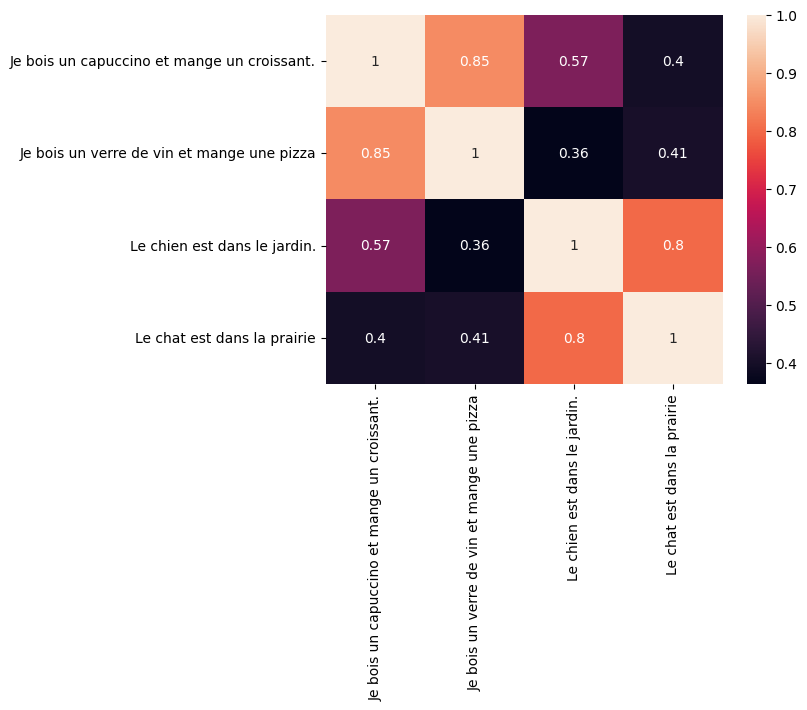

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sentences = [sentence_1, sentence_2, sentence_3, sentence_4]

similarity = []
for sentence in sentences:
    doc = nlp(sentence)
    sim = []
    for sentence in sentences:
        doc1 = nlp(sentence)
        sim.append(doc.similarity(doc1))
    similarity.append(sim)

sns.heatmap(similarity, annot=True, xticklabels=sentences, yticklabels=sentences)


## 3. Conclusion

Nous avons vu ici les bases de l'analyse NLP à travers SpaCy. Mais l'outil offre des possibilités beaucoup plus larges. Si cela vous intéresse, n'hésitez pas à parcourir la [documentation en ligne](https://spacy.io/) de l'outil qui est exhaustive et très bien rédigée.

Dans le cadre du TP, vous aurez l'occasion de vous familiariser avec le [Matcher](https://spacy.io/api/matcher), qui permet d'extraire des segments de texte sur la base de _patterns_ linguistiques.